#Introduction


#### This notebook is created by Hana
---
**Source** : https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

**Problem Statement**

This dataset contains US airline passenger satisfaction survey. The airline passenger satisfaction survey is an in-depth feedback questionnaire that an airline sends to its passenger to collect feedback about the flying experience.

**Goals**


*   Predict passenger satisfication using Decision Tree, Logistic Regression, Random Forest, and XGBoost Classifier. Focused on seeing the accuracy of the satisfaction target

**Dataset Information**

*   **Gender**: Gender of the passengers (Female, Male)

*  **Customer** Type: The customer type (Loyal customer, disloyal customer)

*    **Age**: The actual age of the passengers

*    **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

*   **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

*   **Flight distance**: The flight distance of this journey

*    **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

*    **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

* **Ease of Online booking**: Satisfaction level of online booking

* **Gate location**: Satisfaction level of Gate location

* **Food and drink**: Satisfaction level of Food and drink

* **Online boarding**: Satisfaction level of online boarding

* **Seat comfort**: Satisfaction level of Seat comfort

* **Inflight entertainment**: Satisfaction level of inflight entertainment

* **On-board service**: Satisfaction level of On-board service

* **Leg room service**: Satisfaction level of Leg room service

* **Baggage handling**: Satisfaction level of baggage handling

* **Check-in service**: Satisfaction level of Check-in service

*  **Inflight service**: Satisfaction level of inflight service

*  **Cleanliness**: Satisfaction level of Cleanliness

*  **Departure Delay in Minutes**: Minutes delayed when departure

*  **Arrival Delay in Minutes**: Minutes delayed when Arrival

*  **Satisfaction**: Airline satisfaction level(Satisfied, neutral or dissatisfied)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.utils import shuffle

In [ ]:
sklearn. __version__

'1.5.2'

#Data Loading

In [ ]:
X_train = pd.read_csv('https://raw.githubusercontent.com/hanarifdahs/datasets/master/train.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/hanarifdahs/datasets/master/test.csv')

In [ ]:
X_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
X_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
X_train.shape, X_test.shape

((103904, 25), (25976, 25))

In [ ]:
X_train.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
X_test.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


#Data Preprocessing

##Split Data

The author from the dataset has seperate the dataset into train and test set by 80% in the train set and 20% in the test set

In [ ]:
y_train = X_train.satisfaction
X_train = X_train.drop(['satisfaction'], axis = 1)
y_test = X_test.satisfaction
X_test = X_test.drop(['satisfaction'], axis = 1)


##Cardinality

There are no high cardinality on the features

In [ ]:
obj_col = X_train.select_dtypes(include=['object'])
for cat in obj_col:
  count = len(X_train[cat].unique())
  print(f"Cardinality of column {cat} is {count}")

Cardinality of column Gender is 2
Cardinality of column Customer Type is 2
Cardinality of column Type of Travel is 2
Cardinality of column Class is 3


##Drop Unnecessary Columns

In [ ]:
X_train.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [ ]:
X_test.drop(['Unnamed: 0','id'], axis=1, inplace=True)

##Handling Outliers

---


###Handling Outliers in Train Set

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [ ]:
#check distribution form skewness
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness


,nama kolom,nilai skewness,distribution
0,Age,-0.0,normal
1,Flight Distance,1.1,skewed
2,Inflight wifi service,0.0,normal
3,Departure/Arrival time convenient,-0.3,normal
4,Ease of Online booking,-0.0,normal
5,Gate location,-0.1,normal
6,Food and drink,-0.2,normal
7,Online boarding,-0.5,normal
8,Seat comfort,-0.5,normal
9,Inflight entertainment,-0.4,normal


In [ ]:
# Mendapatkan kolom numerik dari X_train
num_train = X_train._get_numeric_data()

for k, v in num_train.items():
    # Cek skewness untuk menentukan metode yang digunakan
    if -0.5 <= round(v.skew(), 1) <= 0.5:
        # Distribusi normal -> hitung Z-score manual
        mean = v.mean()
        std = v.std()
        threshold = 3  # Threshold untuk outlier Z-score ±3

        # Identifikasi outlier berdasarkan Z-score
        v_outliers = v[(v < mean - threshold * std) | (v > mean + threshold * std)]

        # Batas bawah dan atas berdasarkan Z-score
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
    else:
        # Distribusi tidak normal -> gunakan IQR
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_outliers = v[(v < q1 - 1.5 * iqr) | (v > q3 + 1.5 * iqr)]

        # Batas bawah dan atas berdasarkan IQR
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

    # Hitung persentase outlier
    perc = (len(v_outliers) / len(v)) * 100

    # Tampilkan hasil
    print(f"Column {k} - Lower bound: {round(lower_bound,3)}, Upper bound: {round(upper_bound,3)}, Outliers = {perc:.2f}%")


Column Age - Lower bound: -5.965, Upper bound: 84.725, Outliers = 0.02%
Column Flight Distance - Lower bound: -1579.5, Upper bound: 3736.5, Outliers = 2.20%
Column Inflight wifi service - Lower bound: -1.254, Upper bound: 6.713, Outliers = 0.00%
Column Departure/Arrival time convenient - Lower bound: -1.515, Upper bound: 7.636, Outliers = 0.00%
Column Ease of Online booking - Lower bound: -1.44, Upper bound: 6.954, Outliers = 0.00%
Column Gate location - Lower bound: -0.856, Upper bound: 6.81, Outliers = 0.00%
Column Food and drink - Lower bound: -0.786, Upper bound: 7.191, Outliers = 0.00%
Column Online boarding - Lower bound: -0.798, Upper bound: 7.299, Outliers = 0.00%
Column Seat comfort - Lower bound: -0.518, Upper bound: 7.397, Outliers = 0.00%
Column Inflight entertainment - Lower bound: -0.641, Upper bound: 7.357, Outliers = 0.00%
Column On-board service - Lower bound: -0.483, Upper bound: 7.247, Outliers = 0.00%
Column Leg room service - Lower bound: -0.596, Upper bound: 7.298

##Handling Missing Values

In [ ]:
X_train.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
X_test.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


Arrival Delay in Minutes merupakan MAR karena terdapat hubungannya dengan Departure Delay in Minutes. Jika pesawat terlambat saat berangkat kemungkinan besar sampainya juga akan terlambat

In [ ]:
# Korelasi dengan "Departure Delay in Minutes"
X_train[['Arrival Delay in Minutes', 'Departure Delay in Minutes']].corr()


,Arrival Delay in Minutes,Departure Delay in Minutes
Arrival Delay in Minutes,1.000000,0.965481
Departure Delay in Minutes,0.965481,1.000000


Karena korelasi antara Arrival Delay dan Departure Delay tinggi maka bisa kita pilih salah satu kolom. Artinya kita meng-handle missing value di kolom tersebut dengan drop kolom

In [ ]:
X_train.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)
X_test.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)


##Feature Selection using Feature Importance

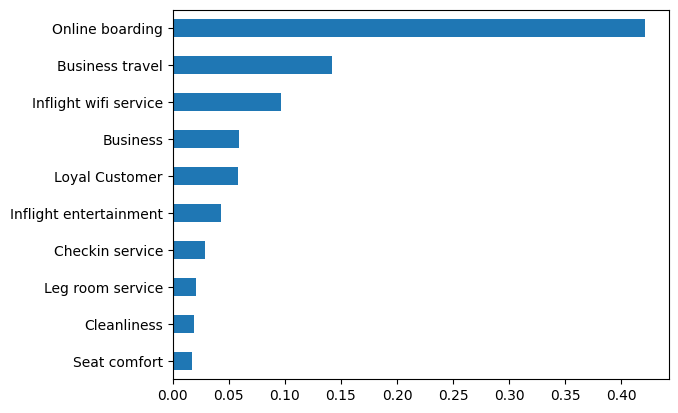

In [ ]:
# fit model no training data
model = XGBClassifier()
X_train_ohe = pd.get_dummies(X_train, prefix='', prefix_sep='',
                            columns=['Customer Type','Type of Travel','Class', 'Gender'])
y_train_ohe = y_train.copy()
# Encode target labels
label_encoder = LabelEncoder()
y_train_ohe = label_encoder.fit_transform(y_train)
model.fit(X_train_ohe, y_train_ohe)
# # feature importance
# print(model.feature_importances_)
# # plot
# plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
# plt.show()
feat_importances = pd.Series(model.feature_importances_, index=X_train_ohe.columns)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

From the important features and EDA the impactful features are,

* Class of travel

* Arrival/Departure delays

* Services provided in the flight

Based on the Feature Importance, we will drop some of the features that we think it doesn't give a high impact to the prediction

In [ ]:
X_train.columns, X_test.columns

(Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
        'Flight Distance', 'Inflight wifi service',
        'Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service',
        'Cleanliness', 'Departure Delay in Minutes'],
       dtype='object'),
 Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
        'Flight Distance', 'Inflight wifi service',
        'Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service',
        'Cleanliness', 'Departure Delay in Minutes'],
       dtype='object'))

In [ ]:
#### Encode target
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

### Column Transformer

In [ ]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', StandardScaler(), selector(dtype_exclude='object')),
('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

#Modelling

In [ ]:
#Making pipeline for LogReg
pipe_logreg = Pipeline([
('transformer', transformer),
('classifier', LogisticRegression())
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())
])

# Base Model Evaluation

##**Logistic Regression**

In [ ]:
pipe_logreg.fit(X_train, y_train)
print('Training Score: ',round(pipe_logreg.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_logreg.score(X_test, y_test),4))

Training Score:  0.8749
Testing Score:  0.8715


In [ ]:
y_logreg_pred = pipe_logreg.predict(X_test)
y_logreg_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
target = ['Neutral or Dissatisfied', 'Satisfied']
print(classification_report(y_test, y_logreg_pred, target_names = target))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.87      0.90      0.89     14573
              Satisfied       0.87      0.83      0.85     11403

               accuracy                           0.87     25976
              macro avg       0.87      0.87      0.87     25976
           weighted avg       0.87      0.87      0.87     25976



In [ ]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_logreg,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.85181905 0.85007991 0.85624237]
F1 Score - Mean - Cross Validation :  0.8527137771257395
F1 Score - Std - Cross Validation  :  0.0025941479213347925
F1 Score - Range of Test-Set       :  0.8501196292044046 - 0.8553079250470743


##**Decision Tree Classifier**

In [ ]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.9466


In [ ]:
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
target = ['Neutral or Dissatisfied', 'Satisfied']
print(classification_report(y_test, y_dt_pred, target_names = target))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.95      0.95      0.95     14573
              Satisfied       0.94      0.94      0.94     11403

               accuracy                           0.95     25976
              macro avg       0.95      0.95      0.95     25976
           weighted avg       0.95      0.95      0.95     25976



In [ ]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.93433321 0.93605289 0.93497959]
F1 Score - Mean - Cross Validation :  0.935121894844603
F1 Score - Std - Cross Validation  :  0.0007092285252866099
F1 Score - Range of Test-Set       :  0.9344126663193163 - 0.9358311233698896


##**Random Forest Classifier**

In [ ]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.9637


In [ ]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
target = ['Neutral or Dissatisfied', 'Satisfied']
print(classification_report(y_test, y_rf_pred, target_names = target))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.96      0.98      0.97     14573
              Satisfied       0.97      0.94      0.96     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976



In [ ]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.95431128 0.95549464 0.95758316]
F1 Score - Mean - Cross Validation :  0.9557963569388893
F1 Score - Std - Cross Validation  :  0.0013526687484893465
F1 Score - Range of Test-Set       :  0.9544436881903999 - 0.9571490256873787


##**XGBoost Classifier**

In [ ]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  0.9744
Testing Score:  0.9638


In [ ]:
y_xgb_pred = pipe_xgb.predict(X_test)
y_xgb_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
target = ['Neutral or Dissatisfied', 'Satisfied']
print(classification_report(y_test, y_xgb_pred, target_names = target))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.96      0.98      0.97     14573
              Satisfied       0.97      0.94      0.96     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976



In [ ]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_xgb,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.95492205 0.95715539 0.95647174]
F1 Score - Mean - Cross Validation :  0.9561830605936802
F1 Score - Std - Cross Validation  :  0.0009343267705049554
F1 Score - Range of Test-Set       :  0.9552487338231752 - 0.9571173873641852


##Base Model Comparison

In [ ]:
models = {
    'Logistic Regression' : pipe_logreg,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [ ]:
df_model

,Logistic Regression,Decision Tree,Random Forest,XGBoost
Accuracy,0.871497,0.946566,0.963697,0.963774
F1-Score,0.850461,0.939208,0.957997,0.958113


In [ ]:
models = {
    'Logistic Regression' : pipe_logreg,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Mean' : cross_val_score(models[model], X_train, y_train, cv = 3, scoring='f1').mean(),
    'Std' : cross_val_score(models[model], X_train, y_train, cv = 3, scoring='f1').std()
}

df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

for i in metrics.keys():
  for j in models.keys():
    df_cross_val.loc[i, j] = metrics[i]

In [ ]:
df_cross_val

,Logistic Regression,Decision Tree,Random Forest,XGBoost
Mean,0.956183,0.956183,0.956183,0.956183
Std,0.000934,0.000934,0.000934,0.000934


From the base model scores, Random forest has the highest score, but it is over-fit to the training set, we will see whether random forest is still the best model with the highest score after tuning the model.

#Model Optimization

In [ ]:
##Parameter Tuning

param_rf = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__n_estimators' : [1,10,100],
    'classifier__max_depth' : np.arange(4,8,2)
}

#Model Optimization Evaluation

##**Random Forest Classifier**

In [ ]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

Train Set Score :  0.931003618724977
Test Set Score :  0.930628272251309


In [ ]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 6, 'classifier__n_estimators': 100, 'transformer__scaler': MinMaxScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x782119a26470>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x782119a25b10>)])),
                ('classifier', RandomForestClassifier(max_depth=6))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank

In [ ]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     14573
           1       0.93      0.92      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



Random Forest is at good fit after we tune the model

#Model After Tuning Comparison

In [ ]:
models = {
    'Random Forest' : best_pipe_rf
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [ ]:
df_model

,Logistic Regression,Decision Tree,Random Forest,XGBoost
Accuracy,0.871497,0.946566,0.963697,0.963774
F1-Score,0.850461,0.939208,0.957997,0.958113


In [ ]:
model_tuning

,Random Forest
Accuracy,0.930628
F1-Score,0.920582


Based on the comparison between the base model and the tuned model, the best models are the untuned Random Forest and XGBoost. To select the least complex option, we will choose Random Forest as the best model and save it.

#Save model

In [ ]:
import pickle

pickle.dump(pipe_rf, open('model_rf.pkl', 'wb'))

###Inference

In [ ]:
with open('model_rf.pkl', 'rb') as file_1:
  model = pickle.load(file_1)

In [ ]:
df_inf = {
    'id'	: '1',
'Gender'	: 'Male',
'Customer Type'	: 'Loyal Customer',
'Age'	: 17,
'Type of Travel'	: 'Business travel',
'Class' : 'Business',
'Flight Distance' :  4819,
'Inflight wifi service'	: 7,
'Departure/Arrival time convenient': 8,
'Ease of Online booking'	: 8,
'Gate location'	: 5,
'Food and drink'	: 6,
'Online boarding'	: 7,
'Seat comfort'	: 4,
'Inflight entertainment': 9,
'On-board service'	:2,
'Leg room service'	:7,
'Baggage handling'	:5,
'Checkin service' :9,
'Inflight service' :8,
'Cleanliness'	:9,
'Departure Delay in Minutes':0,
'Arrival Delay in Minutes' :0
}
df_inf = pd.DataFrame([df_inf])
df_inf

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Male,Loyal Customer,17,Business travel,Business,4819,7,8,8,...,4,9,2,7,5,9,8,9,0,0


In [ ]:
y_pred_inf = model.predict(df_inf)
y_pred_inf

array([1])